In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pendulum

In [2]:
val_state = 50
val_control = 3

# defining control
#control = np.array([-4, 0, 4])              #uncomment for part - 1
control = np.array([-5, 0, 5])             #uncomment for part - 2

# we generate 50 equally spaced points for theta
discretized_theta = np.linspace(0, (2 * np.pi), val_state, endpoint = False)

# we generate 50 equally spaced points for omega
discretized_omega = np.linspace(-6, 6, val_state)

In [3]:
def get_cost(x, u):
    return ((x[0] - np.pi) ** 2) + (0.01 * (x[1] ** 2)) + (0.0001 * (u ** 2))

In [4]:
def get_policy_and_value_function(q_table):
    value_function = np.zeros([val_state, val_state])
    policy = np.zeros([val_state, val_state])

    for i in range(val_state):
        for j in range(val_state):
            ix = np.argmin(q_table[i, j, :])
            value_function[i, j] = q_table[i, j, ix]
            policy[i, j] = control[ix]
            
    return value_function, policy

In [5]:
def q_learning(q_table):
    q_table_copy = q_table
    gamma = 0.1
    epsilon = 0.1
    alpha = 0.99
    #episodes = 4000
    episodes = 5000
    steps = 100
    l_cost = []

    for episode in range(episodes):
        x_curr = np.array([0, 0])
        curr_cost = 0
        for step in range(steps):
            index_theta = np.argmin(np.abs(discretized_theta - x_curr[0]))
            index_omega = np.argmin(np.abs(discretized_omega - x_curr[1]))

            num = (np.random.randint(100, size = 1) / 100.0)
        
            if (num <= epsilon):
                index_control = np.random.randint(val_control, size = 1)
            else:
                index_control = np.argmin(q_table_copy[index_theta, index_omega, :])

            u_curr = control[index_control]

            closest_theta = discretized_theta[index_theta]
            closest_omega = discretized_omega[index_omega]
            x_curr = np.array([closest_theta, closest_omega])

            x_next = pendulum.get_next_state(x_curr, u_curr)
            index_theta_next = np.argmin(np.abs(discretized_theta - x_next[0]))
            index_omega_next = np.argmin(np.abs(discretized_omega - x_next[1]))

            theta_next = discretized_theta[index_theta_next]
            omega_next = discretized_omega[index_omega_next]
            x_next = np.array([theta_next, omega_next])

            g = get_cost(x_curr, u_curr)
            curr_cost = curr_cost + (alpha ** step) * g
            dt = g + (alpha * min(q_table_copy[index_theta_next, index_omega_next, :])) - q_table_copy[index_theta, index_omega, index_control]
            q_table_copy[index_theta, index_omega, index_control] = q_table_copy[index_theta, index_omega, index_control] + (gamma * dt)
        
            x_curr = x_next
            prev_cost = curr_cost
        l_cost.append(curr_cost)
    return q_table_copy, episodes, l_cost

In [6]:
q_table = np.zeros((val_state, val_state, val_control))
updated_q_table, episodes, l_cost = q_learning(q_table)
value_function, policy = get_policy_and_value_function(updated_q_table)

In [7]:
def controller(x):
    i_theta = np.argmin(np.abs(discretized_theta - x[0]))
    i_omega = np.argmin(np.abs(discretized_omega - x[1]))
    u = policy[i_theta, i_omega]
    return u

In [8]:
T = 10.
x0 = np.array([0., 0.])
t, x, u = pendulum.simulate(x0, controller, T)
pendulum.animate_robot(x)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAlEJtZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhy
ZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA0lZYiEABH//veIHzLL
afk613IR560urR9Q7kZxXqS9/iAAAAMAAAMAAhx4K/IdYwN+m6AAADWgBpw55P9Lik08QDQTJJTs
eQH6Ms0zYxmaMUjIyNl6qRuZrshaZKQOqAgD1Kf3W+ly8B+ir0DIYmoIoDZNSU56Y+Rv6y8ixTrW
v7uyxJL/ZadNHCPEnBsXVPQWkYrAxkYu1OOmjKv23mhSUfGvA+9a2q8GQs9zr/C5hyR6fPCPcdy4
Y2DM/lL1CK+/cnAVFoAt6ArQmoSyBdsU1CZY9PfR5n9GEKsOuy0le9GAAVYE6w1ocAKQrOcDzyQ1
xZAbmoO8JctrCBggxUnFmkK9aetrymx+287Hpc+JInLHollI6w1KjFM8vH8QwjrQA+JXrx7dRPw4
E6bufu9KcBZf9surw1ARR/WDi/igkYqdeC0Hv3coPkyF9vkKrKIPlgzPJIzvItLLw3oKljZRX6WE
22qVb5oKRRYIjr1BN+PIu8cN/t0TGDQZkFUrD/PeL/ms5MxjAPa3rbbeicZzENzTNsRL4SqWlQu/
nO8aSm67Y9pYsvQuUs+tF+QsIdZ8iwYoP8E7KYd2QgBDL+0tvF0V4qdlqZf64zvuWt9wrHNZ5TV/
xI5J4UXN0LKeqhcte0K7PczV0zy/qjKaqmjuvh0dTUHFsyVnSSPJZrcD0Xa94AsDuJYyqpbFUPGu
bzxDxrx/Tj+w7T7XDNGOuaSVr26nHEolxpSkqJwKLVorHgAAAwAAAwAAAwAACgXGSerJ2Qs6P666
I6Q4oouXxjdGn8m2Jc2Tku2hUIiGOelMXHNRZkmJIeYSbhSkCyFQZiLodbiJYtY46XOoRVvNWJ79
jr5kkKPI2BJ4DzKpO0D1md0pgykK6UmoZrKZNT6jw3B6CuUioIewUZrYiJYo8DWI/fjSMgmVE/NR
yv+TdDQGvf2VzWEfYSb3wPyThbEq5Rh1ZtQGdW9V9ZXzn/qjQCRgJa3AuPP1Rl3y3sGoLCtrq1YX
pA6+dh649S/9nDCjY7yOAArwZecZRq/ohMQaxVYECSnnrR7oYrWM+F8dqndjAo6mObT6WM/MhEpx
Z/6PcByP+d66bfH06B68TC3lHyR0z/Pa/HjZOC7JHQvXaDIZ8BdoLN/2OyihUEB9RXgcUkNech1q
P7pYz8yDN297/gVp+qi8uugqmrstk6G0KGwnDgAAAwAAAwAAF5bsqZy8CNwqoQLeyBtDopoJy2nU
fZwubsJRxMk6yay7q/hUlSjW6MMcdDy3A5hDuu6JhYnmUJhgIlmf7QssEGz5tP4YO2bruzRMZq0U
rEbfcSdhbEVFtGfZL9zfCwTiD4VbWQ+kaWTZsuOz0ekLeiYlNBzgpmDu8tSGz7qcHOslOsWGyX1g
64LeNH/t9kYj0iv+/5yeliLHHCFP//7ELuoFdmGw5Yd2nL4sf4ldfZ4D811ekTtwb+F1wFXKR5yG
ja2hBbGl+lM7VnUqAQ82GHvLzjSpF3JCpPnNev3AjddusTtKGSdN27OXxA08FpdhkefkJEBiYgwN
B/ootLnHe7TeH0xWwYyS1Y8GvltSqr/1Mpcm70ukGRWvKhcQDVKv8Amivhpu7LvGCnLxzEI7tcsu
ErCLzFly46gRMnR2fbyNCvSD5cjCy/X9kEoHSVHRqr3L0uiI1BsIfV9VxrnrWoWzpouNaZrksWud
xmLTtthlW1Jlu3+isXYdCTjvHmBNLdNnc+lJi+3pbVLwl3hiMH/CwdBDSSImYjYZnkcQHUNZZVAC
oLnltZQL4gAhyq2HRhTJBKobiqp9I27qkHbkZom+mZEhVLwi1k0p2PF3skTZiV8UGKklkyDPiiQC
06wU6n8QU2ShfluHdUq/7m91tm3aLXAwNykdMBmPmUBjfXIPQZ4Dz3VmQaseQon3T7abUFd6qYxe
NjsFy6cMKy8GQ3htiBi+l1K7WZl1kG8tkC0PpjAvLfPvbEF23sWwNfqZgCL1uOFMNL69oKUylOYR
e2NzuqcJBeYXsz63nrctO8kNZ360drjqLkVbeRcKEtF4r2mdeUOuzobQ7ymlIK8stElYCZx5ISDc
azYclMxxkQY5D/MXqH1/a48ucr/bUx7r2WtmTV2MRcX4sqrdEI1JIwrOQf62Ok9KdbNqJnGpKJKt
A38o5JdfB1DBRhfDL3UxkFWjBNcUEv3QoReNW7hgOvITxEGI6ZZkktPDG0pCCmQAAzrm4yz/+LYP
iFz/+YT+Tfpe013S/OrX6qmBkjHalkuPEBww6GDyQcDW0zBwebu8rsfIFfCwPXthEvjXR3W12SWw
6fpOCw4eZEW2W237GqFHaqkgUVFlbdMZlsJ9oitpagLoFvx3ywX9tNdyOklf3jd8jIepa2aLBoyJ
ClaT9gAqdkg9y7LMKyd6lNo62QLbMKptMeQQAAWEX62CR2Yg7gbY9VkkBXIJ+qCrAoACihtfkr0I
W4wctpKfuM1jbyYAD3OxTADrFVohxbV0VQSbuvR3vQBcvx6jgxmNpYWSimPU8dj4qCu9sgZkwDli
PGFP692O8jso4iuOA37Chj+FpUBPZVhZWfnOFs5GzgErQ0Bd4bngnGAuO7t5+oB9N77O4bXGR/50
ElbyEOme3JOC1/Arj4UsYonyC+6xo9h6D5J5jwXLOPHG4lE+11w2vQmyfm5xfDx/09cMDz21tkqK
2nn1WA2Z09tI+GQAY5nScweXNM9DIoW159leluzx/tgXHnuSECCTriDqmO1jmIeI29RlzpvjmM5c
cV5vyToI7FqxAuUHPCYSKmTB8miHJJv/yYpjFUdpdRZdrdyA09rSwBFzmz+YJn1R94jSi4B/rIWq
zNPU5DNYJcK//gMC8SO3wbJGXePiUmh3jy78wBCra36VwZOJETEqXMYD5P/pXqUHp8++US59o8P3
9D4fc37X7EMPqUyK8VlBI

Text(0.5, 0, 'Time [s]')

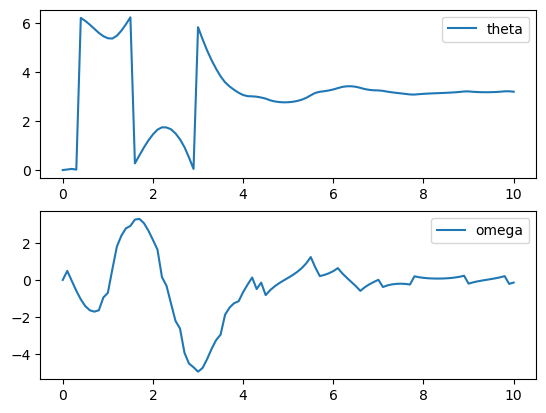

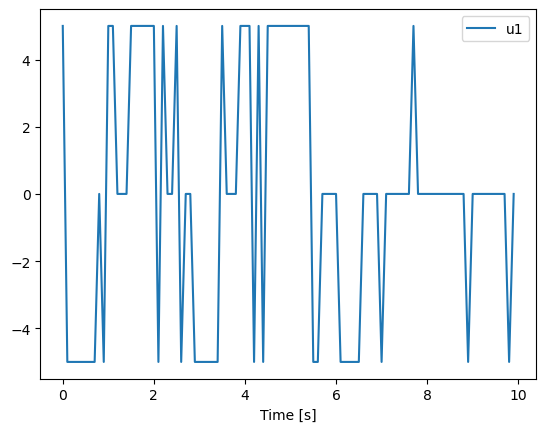

In [9]:
# we can plot the results
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, x[0,:])
plt.legend(['theta'])

plt.subplot(2,1,2)
plt.plot(t, x[1,:])
plt.legend(['omega'])

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1'])
plt.xlabel('Time [s]')

Text(0.5, 1.0, 'Policy')

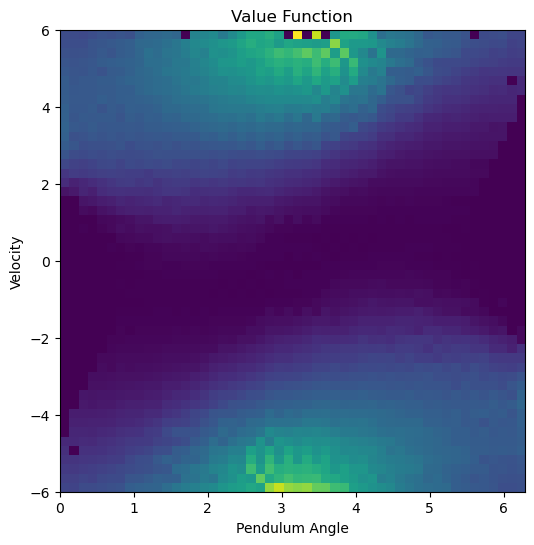

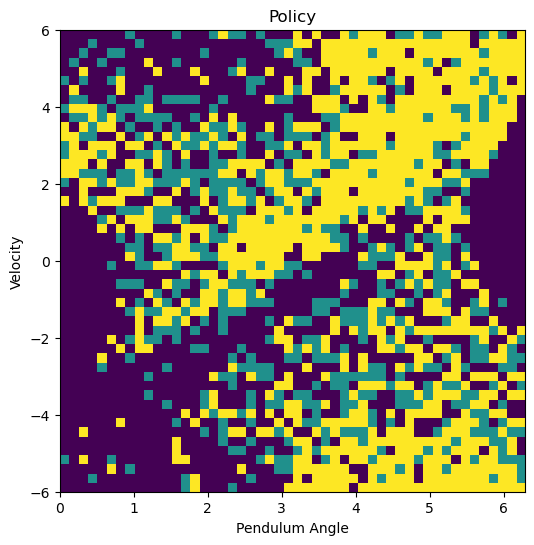

In [10]:
# we plot the value function
plt.figure(figsize = [6, 6])
plt.imshow(value_function, extent=[0., (2 * np.pi), -6, 6], aspect = 'auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6, 6])
plt.imshow(policy, extent=[0., (2 * np.pi), -6, 6], aspect = 'auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')

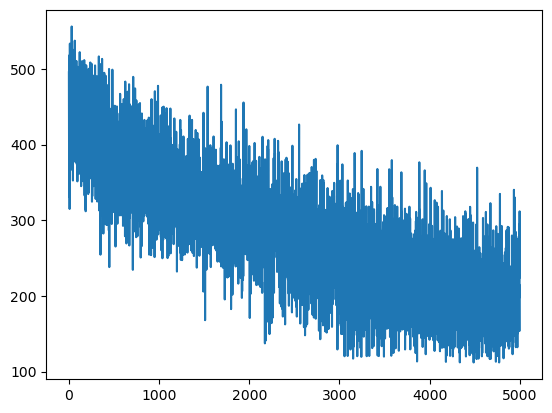

In [11]:
l_episodes = np.arange(0, episodes)
plt.plot(l_episodes, l_cost)